In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
dt = pd.read_csv('data.csv')

In [3]:
dt.head()

,km,price
0,240000,3650
1,139800,3800
2,150500,4400
3,185530,4450
4,176000,5250


<AxesSubplot:title={'center':'data'}, xlabel='km', ylabel='price'>

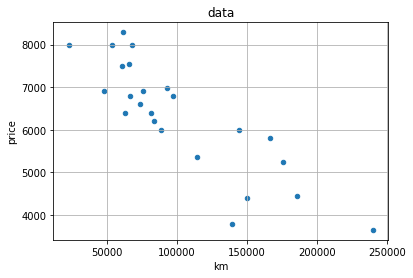

In [4]:
dt.plot(kind='scatter', x='km', y='price', grid=True, title='data')

In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   km      24 non-null     int64
 1   price   24 non-null     int64
dtypes: int64(2)
memory usage: 512.0 bytes


In [6]:
dt.describe()

,km,price
count,24.000000,24.000000
mean,101066.250000,6331.833333
std,52674.245606,1319.654193
min,22899.000000,3650.000000
25%,65020.500000,5687.500000
50%,83014.500000,6495.000000
75%,140975.000000,7115.000000
max,240000.000000,8290.000000


In [7]:
class FtLinearRegression:
    def __init__(self):
        self.theta = None
    
    def fit(self, X, y, n_iterations=1000, learning_rate=0.1):
        m = X.shape[0]
        X_intercept = X.copy()
        X_intercept = np.hstack((np.ones((m, 1)), X_intercept))
        self.theta = np.zeros((X_intercept.shape[1], 1))
        for iteration in range(n_iterations):
            gradients = (2 / m) * X_intercept.T @ (X_intercept @ self.theta - y)
            self.theta -= learning_rate * gradients
        print(self.theta)
    
    def predict(self, X):
        m = X.shape[0]
        X_intercept = X.copy()
        X_intercept = np.hstack((np.ones((m, 1)), X_intercept))
        return X_intercept @ self.theta
    
    def score(self, X, y):
        y_pred = self.predict(X)
        ss_res = ((y - y_pred) ** 2).sum()
        ss_tot = ((y - y.mean()) ** 2).sum()
        return 1 - ss_res / ss_tot

In [8]:
X = dt['km'].to_numpy().reshape(-1, 1)
y = dt['price'].to_numpy().reshape(-1, 1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
X_train = StandardScaler().fit_transform(X_train)

In [11]:
l_model = FtLinearRegression()
l_model.fit(X_train, y_train)

[[ 6545.9375    ]
 [-1061.50194225]]


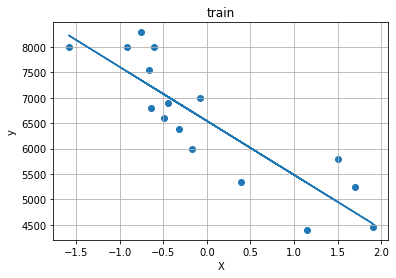

0.7605885917636953


In [12]:
y_train_res = l_model.predict(X_train)
plt.plot(X_train, y_train_res)
plt.scatter(X_train, y_train)
plt.grid()
plt.xlabel('X')
plt.ylabel('y')
plt.title('train')
plt.show()
print(l_model.score(X_train, y_train))

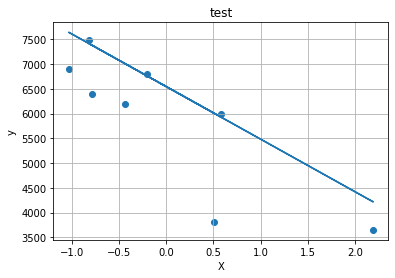

0.47695512161632936


In [13]:
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)
y_test_res = l_model.predict(X_test)
plt.plot(X_test, y_test_res)
plt.scatter(X_test, y_test)
plt.grid()
plt.xlabel('X')
plt.ylabel('y')
plt.title('test')
plt.show()
print(l_model.score(X_test, y_test))